In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Sample/future.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,DepDelayMinutes,DepDel15,CarrierDelay,weatherCode,precipMM,WindGustKmph,windspeedKmph,DepTime,DewPointF,pressure,cloudcover,CRSDepTime,visibility,tempF,WindChillF,humidity,Dest,delay
0,209.0,1.0,209.0,386,0.7,23,19,1729.0,75,1016,60,1400,10,84,85,53,MCO,207.287000
1,45.0,1.0,37.0,143,0.0,10,8,100.0,76,1016,54,15,5,83,80,87,MCO,40.925644
2,24.0,1.0,0.0,122,0.1,7,6,2144.0,62,1014,96,2120,10,65,65,90,LAX,18.218033
3,21.0,1.0,20.0,353,0.4,9,5,113.0,74,1014,100,52,7,75,74,99,IAH,23.436950
4,0.0,0.0,0.0,122,0.0,11,9,657.0,56,1016,86,700,10,64,63,80,SFO,11.308575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496485,54.0,1.0,37.0,113,0.0,9,8,53.0,43,1015,0,2359,10,53,54,62,ATL,41.083935
496486,77.0,1.0,0.0,113,0.0,16,8,102.0,44,1012,4,2345,10,53,53,65,CLT,67.361370
496487,76.0,1.0,44.0,113,0.0,21,14,16.0,54,1014,0,2300,10,66,64,71,MIA,66.190315
496488,90.0,1.0,0.0,353,0.9,13,9,115.0,55,1021,100,2345,9,64,64,74,CLT,82.846610


In [4]:
data['Dest'][data['delay'] == data['delay'].max()]

120740    DFW
Name: Dest, dtype: object

In [5]:
airports = ['ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO']
total_delays = {}

for i in range(len(airports)):
    split = data[data['Dest'] == airports[i]]
    delay_sum = split['delay'].sum()
    total_delays.update({airports[i]:delay_sum})

In [6]:
busy_order = {}
sort = sorted(total_delays.items(), key=lambda x: x[1], reverse=False)
for i in range(len(sort)):
    busy_order.update({sort[i][0]:sort[i][1]})
busy_order

{'CLT': 752367.0420845,
 'IAH': 996123.034268,
 'MIA': 1059610.9979289998,
 'PHX': 1187372.227035,
 'SEA': 1274539.255748,
 'MCO': 1313386.9049315,
 'LAS': 1516611.4064145,
 'DFW': 1576334.7070999998,
 'ATL': 1576420.219382,
 'DEN': 1601532.5181874998,
 'JFK': 1698844.7416735,
 'EWR': 1843899.240988,
 'ORD': 2016245.677259,
 'LAX': 2909338.7820125003,
 'SFO': 3197094.9494640003}

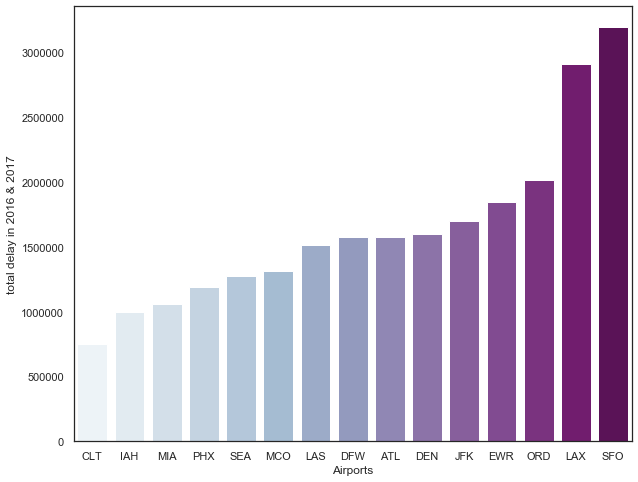

In [41]:
import seaborn as sns
stations = []
delay = []
for x in busy_order:
    stations.append(x)
    delay.append(busy_order[x])
fig = plt.figure(figsize=(10, 8))
size = [150, 180, 200, 230, 240, 260, 290, 299, 300, 315, 330, 360, 390, 570, 620]
print('\n')
plt.xlabel('Airports')
plt.ylabel('total delay in 2016 & 2017')
sns.set(style="white")
sns.barplot(stations, delay, palette="BuPu")
plt.show()
fig.savefig('plot1.png', transparent = True)

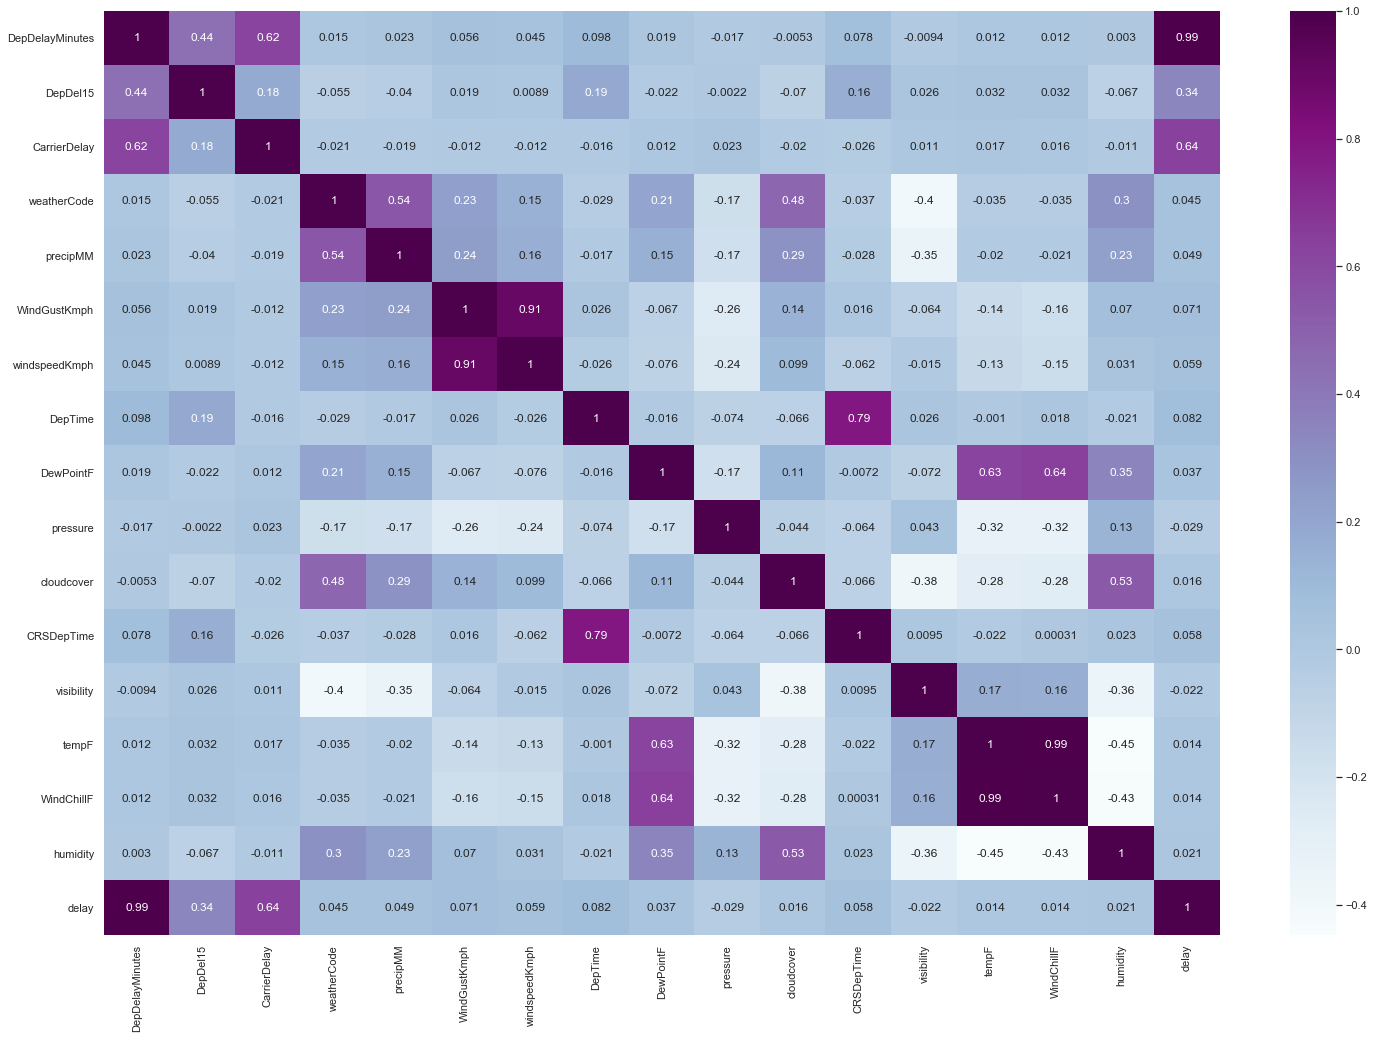

In [43]:
fig = plt.figure(figsize=(25, 17))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.BuPu)
plt.show()
fig.savefig('plot2.png', transparent = True)